In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

colabdir = '/content/drive/My Drive/Colab Notebooks/data/'

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0906-07-train-v2.csv')

In [0]:
# 0으로 보간한 데이터
df_0 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0906-07-train-v2-withNA.csv')
df_0 = df_0.fillna(0)

# label data

In [4]:
train_label = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_label.csv")
train_label = train_label.sort_values('acc_id')
train_label_time = train_label.drop(columns='amount_spent')
train_label_money = train_label.drop(columns='survival_time')
train_label.head()

,acc_id,survival_time,amount_spent
22410,2,64,0.000000
12651,5,60,0.000000
5494,8,64,0.020310
6811,17,64,0.070642
16854,20,64,0.052137


# Correlationship 분석! : 주요 피쳐만 사용

In [0]:
label = train_label.copy()

In [0]:
label['isSurvival'] = label['survival_time'].transform(lambda x: 1 if x==64 else 0)

ids = np.unique(df.acc_id)
days = np.unique(df.day)

df_c = df.drop(['day'], axis=1)
cols = df_c.columns

df_c = df_c.groupby('acc_id').mean()

res = np.concatenate((df_c, label[['amount_spent', 'isSurvival']]), axis=1)

cols = list(cols)
cols.pop(0) # pop 'acc_id'
cols.append('label_amount_spent')
cols.append('label_isSurvival')

df_c = pd.DataFrame(res, index=ids, columns=cols)

cor = df_c.corr(method='spearman').drop(['label_isSurvival','label_amount_spent'])
sur = cor.sort_values('label_isSurvival', ascending=False).label_isSurvival
amo = cor.sort_values('label_amount_spent', ascending=False).label_amount_spent

In [0]:
# amo

In [0]:
# sur

In [0]:
amo_threshold = 0.3
amo_droplist = amo[abs(amo)<amo_threshold].index

sur_threshold = 0.1
sur_droplist = sur[abs(sur)<sur_threshold].index

# Correlationship 분석! : 주요 피쳐만 사용 : NA-> 0 치환 데이터!

In [0]:
label = train_label.copy()

In [0]:
label['isSurvival'] = label['survival_time'].transform(lambda x: 1 if x==64 else 0)

ids_0 = np.unique(df_0.acc_id)
days_0 = np.unique(df_0.day)

df_c_0 = df_0.drop(['day'], axis=1)
cols_0 = df_c_0.columns

df_c_0 = df_c_0.groupby('acc_id').mean()

res_0 = np.concatenate((df_c_0, label[['amount_spent', 'isSurvival']]), axis=1)

cols_0 = list(cols_0)
cols_0.pop(0) # pop 'acc_id'
cols_0.append('label_amount_spent')
cols_0.append('label_isSurvival')

df_c_0 = pd.DataFrame(res_0, index=ids_0, columns=cols_0)

cor_0 = df_c_0.corr(method='spearman').drop(['label_isSurvival','label_amount_spent'])
sur_0 = cor_0.sort_values('label_isSurvival', ascending=False).label_isSurvival
amo_0 = cor_0.sort_values('label_amount_spent', ascending=False).label_amount_spent

In [0]:
amo_threshold = 0.3
amo_droplist_0 = amo_0[abs(amo_0)<amo_threshold].index

sur_threshold = 0.1
sur_droplist_0 = sur_0[abs(sur_0)<sur_threshold].index

## 각 모델별 데이터 생성

In [13]:
data_amo = df.drop(columns=amo_droplist)
data_sur = df.drop(columns=sur_droplist)
print(data_amo.shape, data_sur.shape)

(1120000, 33) (1120000, 38)


In [14]:
data_amo_0 = df_0.drop(columns=amo_droplist_0)
data_sur_0 = df_0.drop(columns=sur_droplist_0)
print(data_amo_0.shape, data_sur_0.shape)

(1120000, 34) (1120000, 37)


## 각 데이터의 feature의 분포 살펴보기 : data_amo

In [0]:
# data_amo
data_amo.head()

,acc_id,day,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_etc_cnt,p_c_cnt,p_random_attacker_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,get_item_amount,get_item_price,trade_type_1,count_get,a_fish,a_npc_kill,a_quest_exp,a_boss_monster,fishing_prop,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2,1,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13000000.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


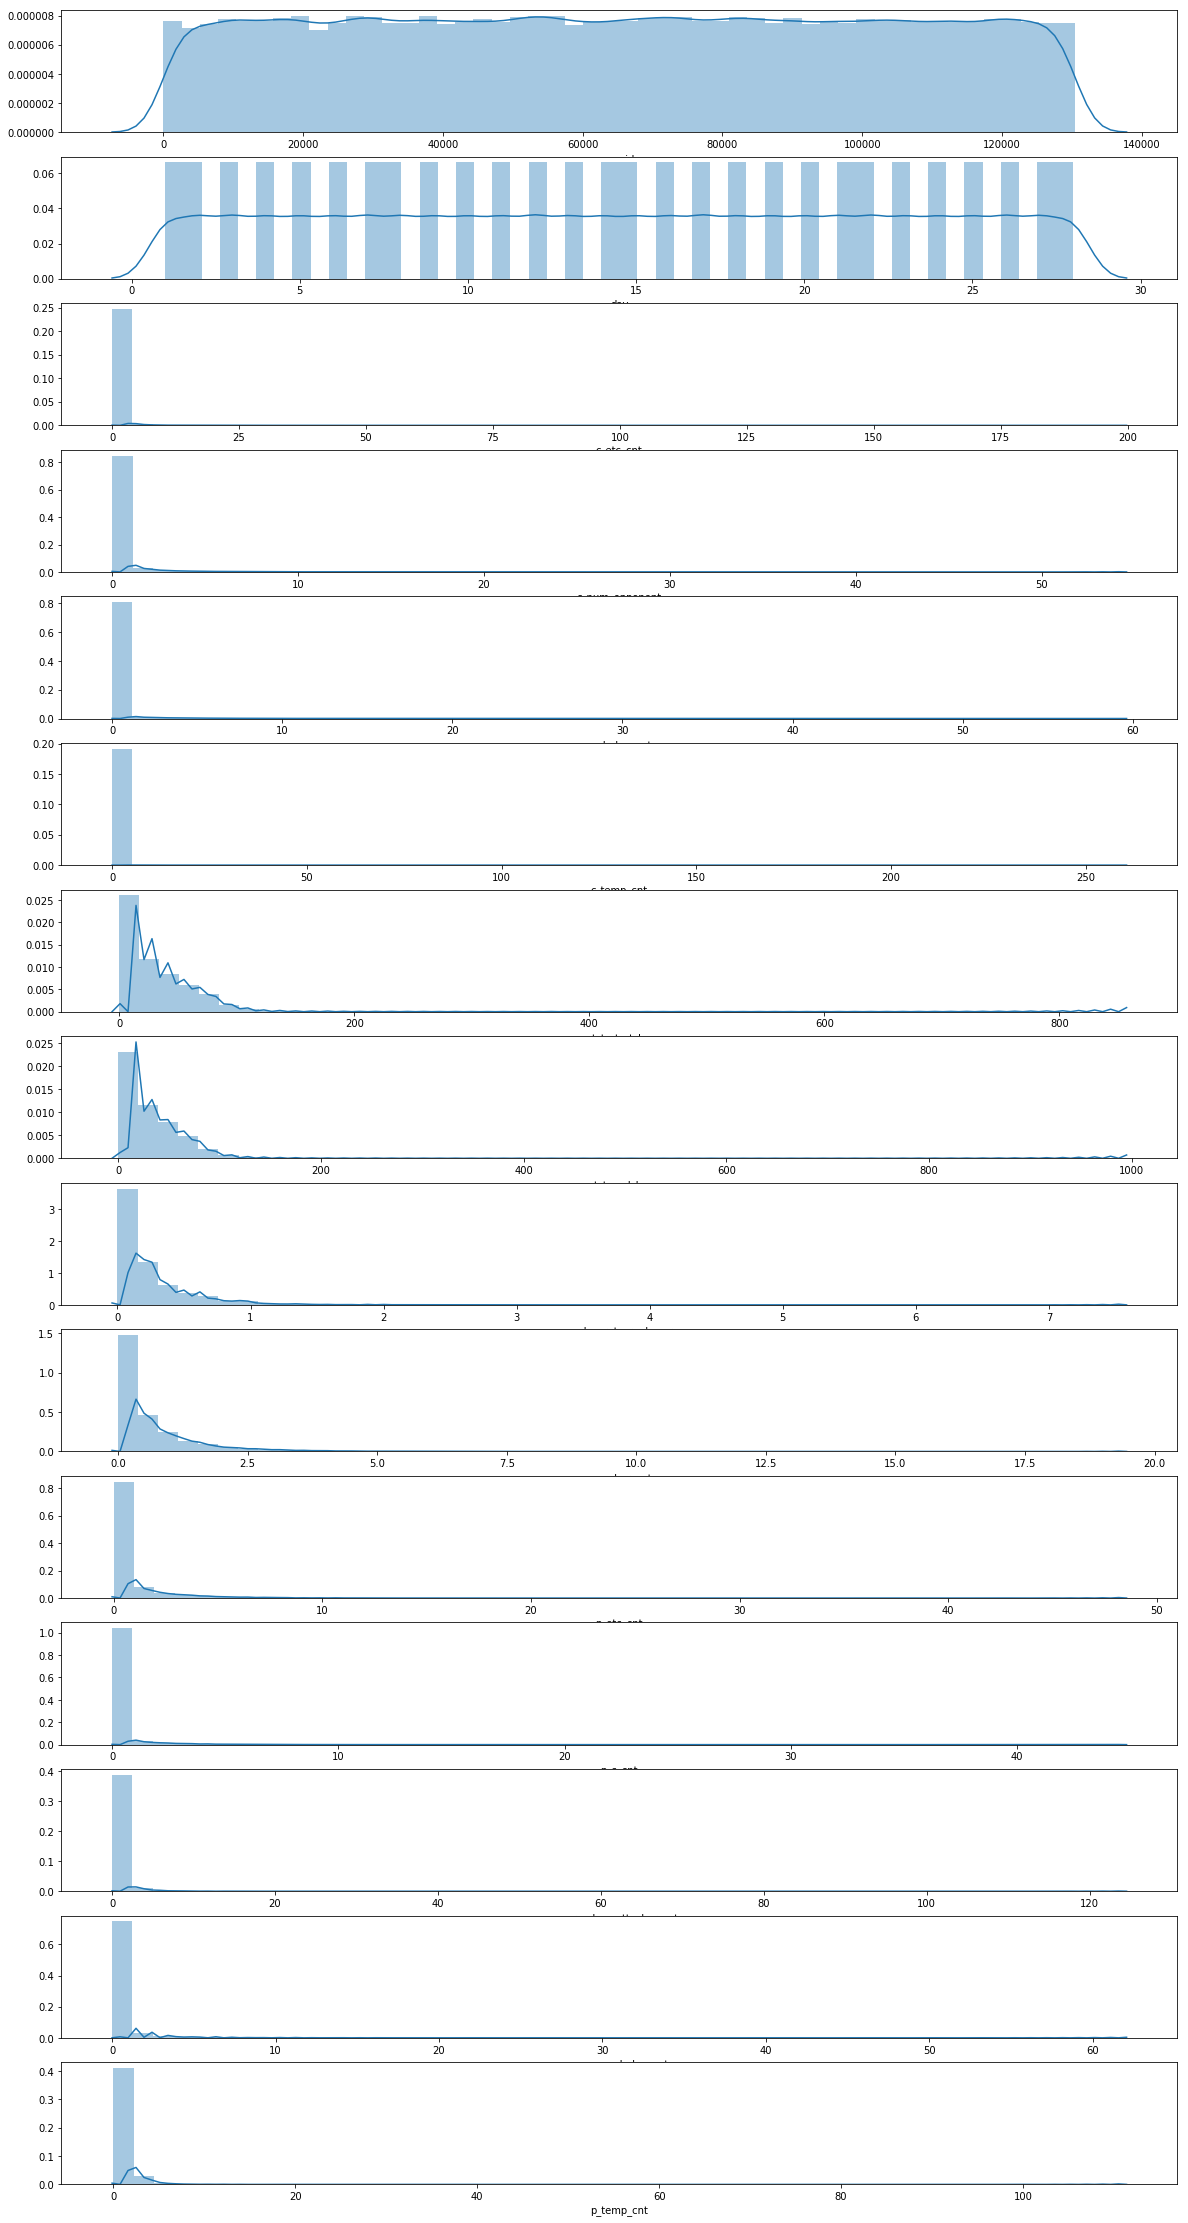

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(len(data_amo.columns[:15]),1,figsize=(20,40))
i = 0
for col in data_amo.columns[:15]:
  sns.distplot(data_amo[col], ax=ax[i])
  i += 1

# sns.kdeplot(data_amo['combat_count'])

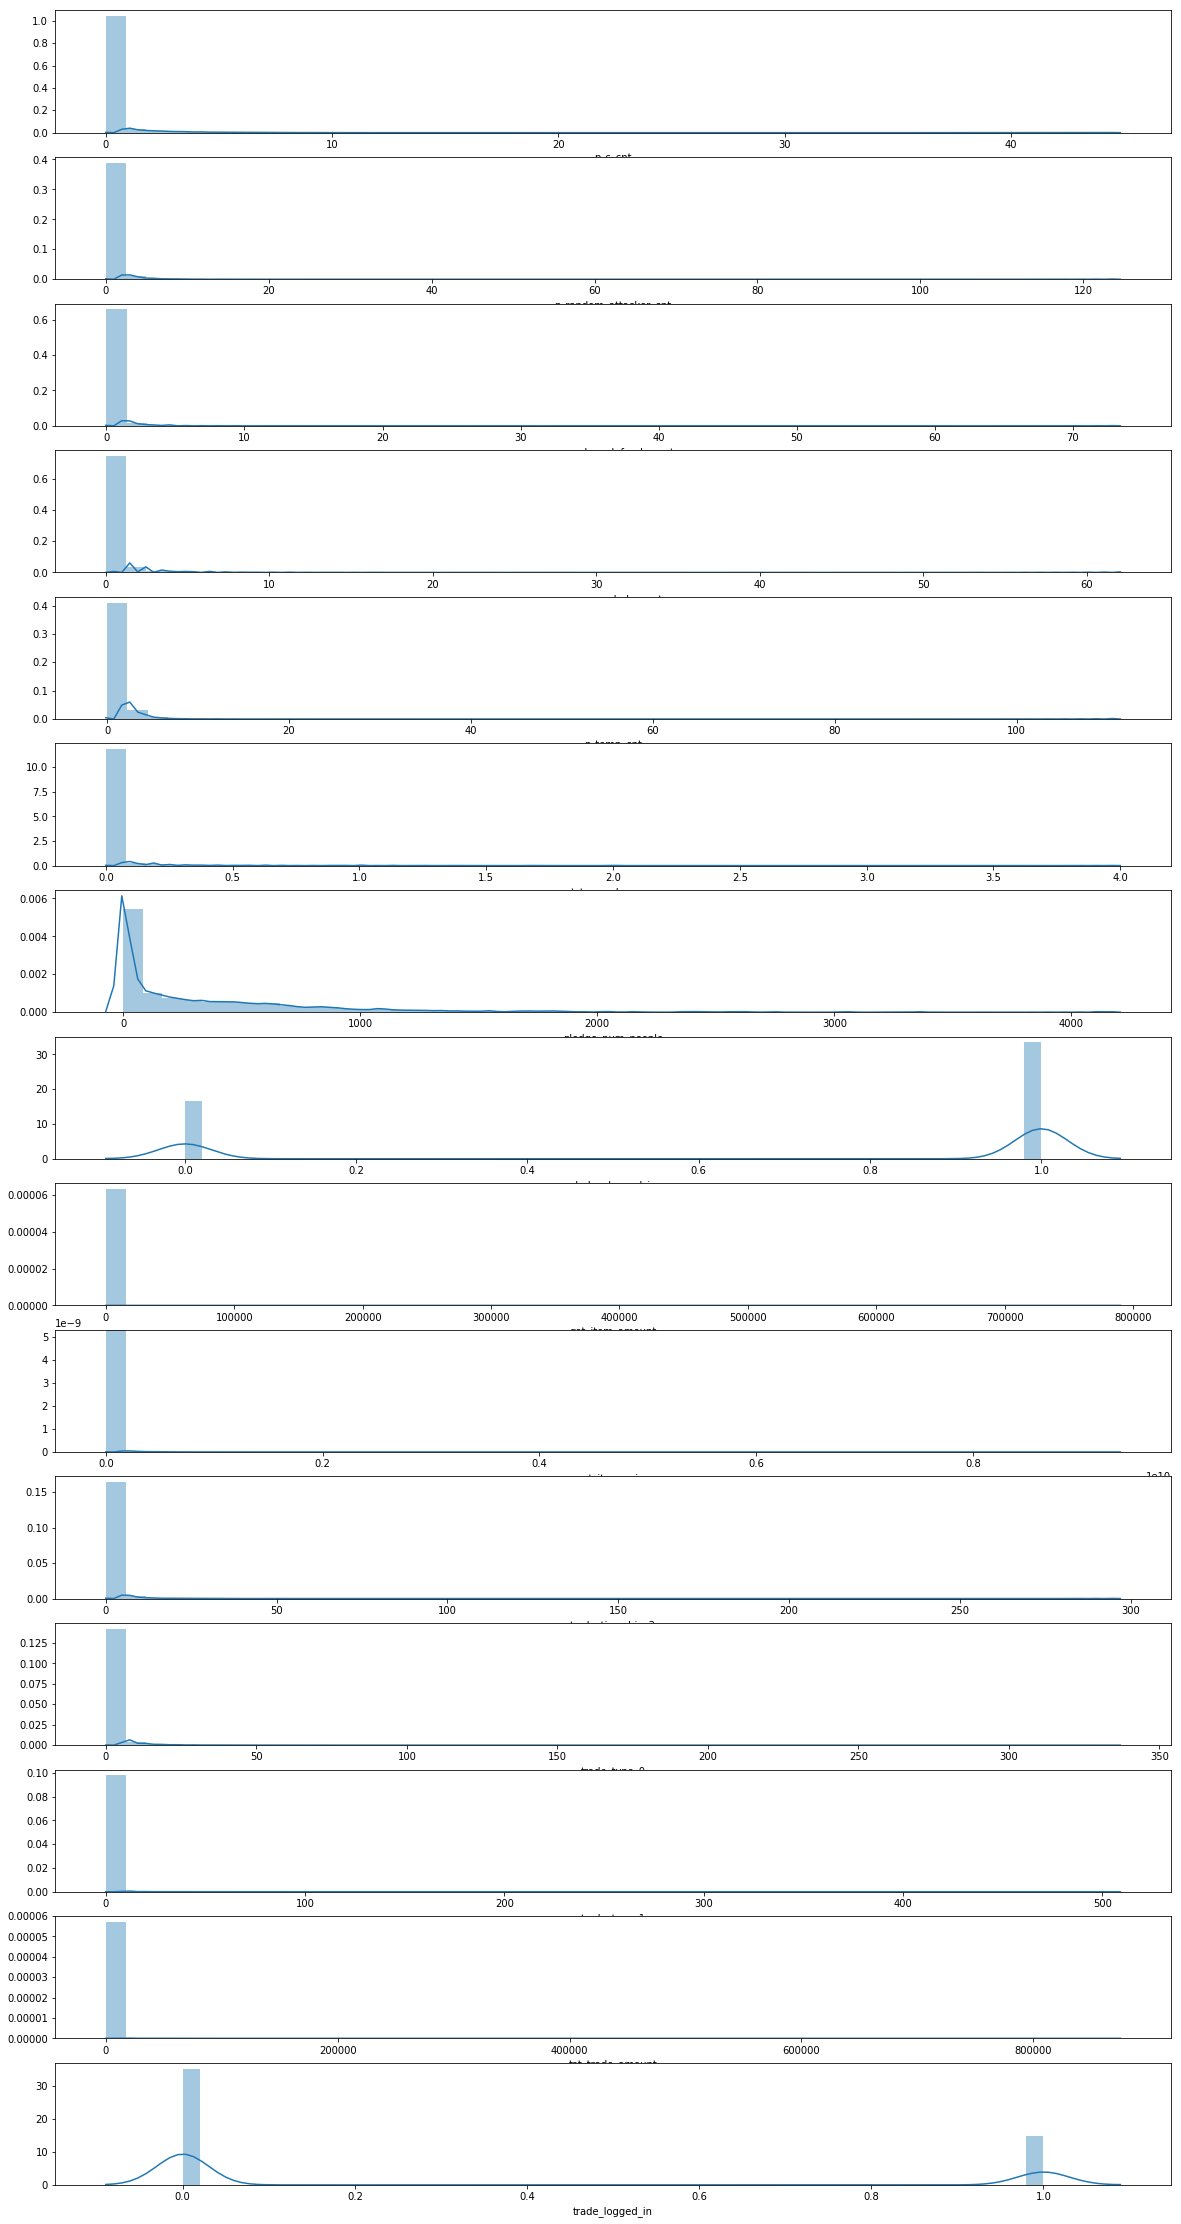

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(len(data_amo.columns[15:30]),1,figsize=(20,40))
i = 0
for col in data_amo.columns[15:30]:
  sns.distplot(data_amo[col], ax=ax[i])
  i += 1

# sns.kdeplot(data_amo['combat_count'])

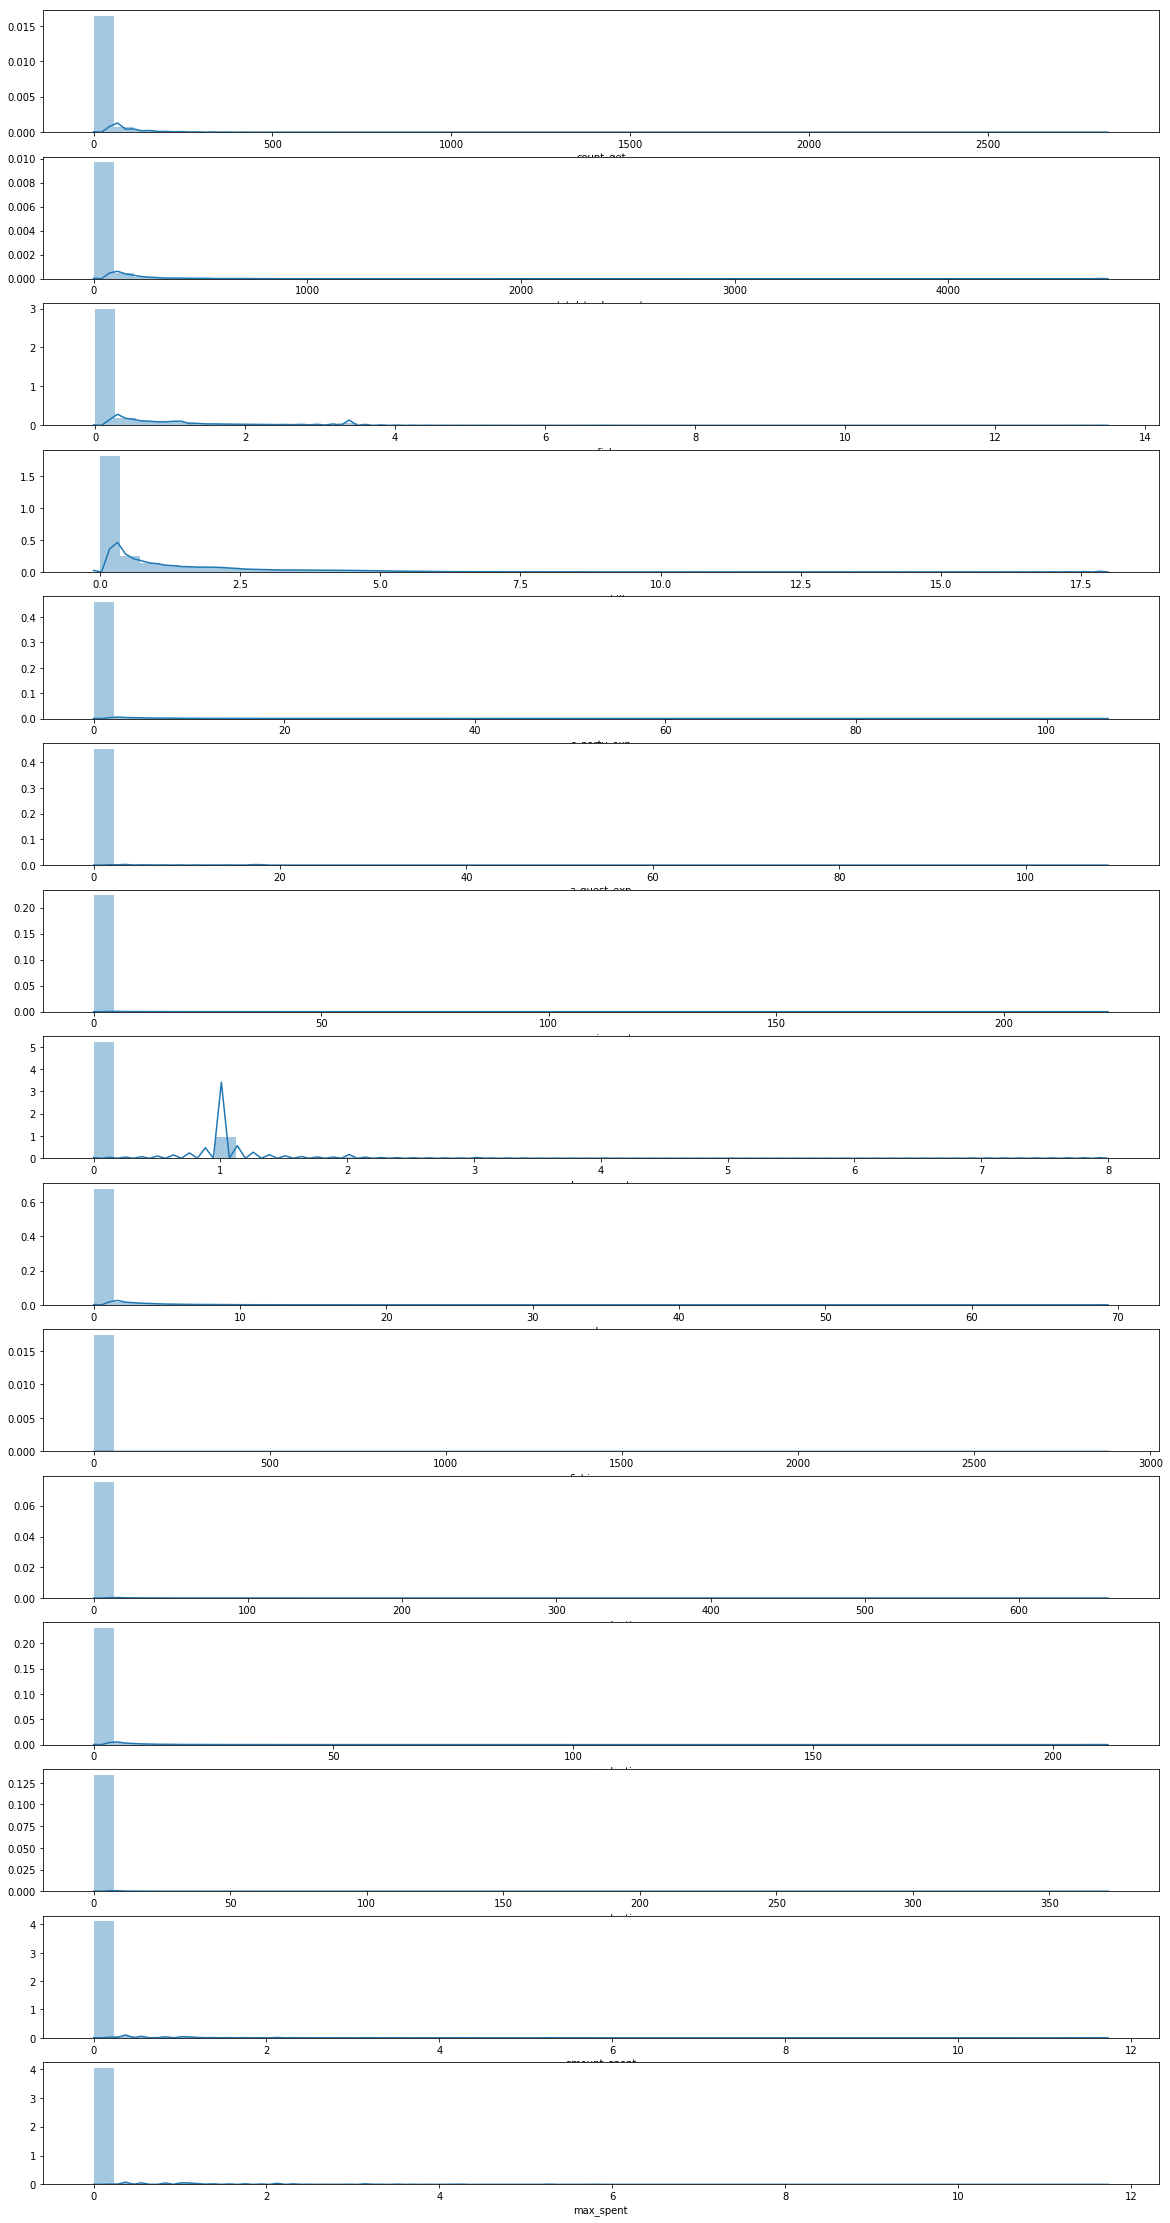

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(len(data_amo.columns[30:45]),1,figsize=(20,40))
i = 0
for col in data_amo.columns[30:45]:
  sns.distplot(data_amo[col], ax=ax[i])
  i += 1

# sns.kdeplot(data_amo['combat_count'])

In [0]:
data_amo.isnull().sum()

acc_id                      0
day                         0
combat_count                0
c_etc_cnt                   0
c_num_opponent              0
c_pledge_cnt                0
c_same_pledge_cnt           0
c_temp_cnt                  0
tot_start_lv                0
tot_end_lv                  0
avg_play_rate_rank_per_p    0
p_c_char_cnt                0
p_c_sum_play_time           0
p_etc_cnt                   0
p_play_char_cnt             0
p_c_cnt                     0
p_random_attacker_cnt       0
p_random_defender_cnt       0
p_same_pledge_cnt           0
p_temp_cnt                  0
tot_c_rank_per_p            0
pledge_num_people           0
pledge_logged_in            0
get_item_amount             0
get_item_price              0
trade_time_bin_3            0
trade_type_0                0
trade_type_1                0
tot_trade_amount            0
trade_logged_in             0
count_get                   0
total_trade_count           0
a_fish                      0
a_npc_kill

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


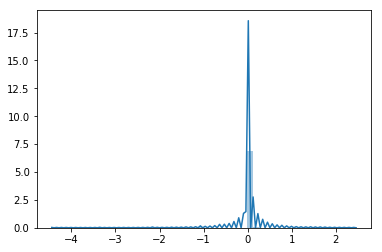

In [0]:
sns.distplot(np.where(data_amo['max_spent']==0,0,np.log(data_amo['max_spent'])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


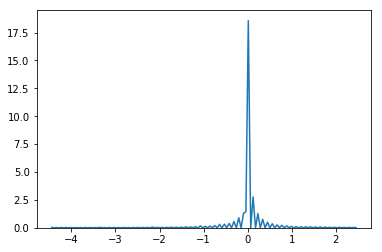

In [0]:
sns.kdeplot(np.where(data_amo['max_spent']==0,0,np.log(data_amo['max_spent'])))

(1120000, 48)


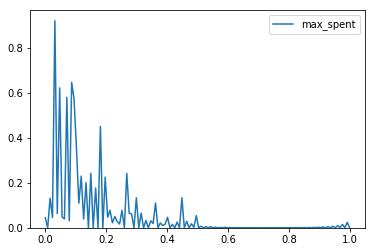

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
val = StandardScaler().fit_transform(data_amo.drop(columns=['acc_id','day']))
val = MinMaxScaler().fit_transform(val)
print(val.shape)
data_amo_s = pd.DataFrame(val, columns=data_amo.drop(columns=['acc_id','day']).columns)

sns.kdeplot(data_amo_s['max_spent'])

# 표준화 / 정규화

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaled_amo = StandardScaler().fit_transform(data_amo.drop(columns=['acc_id','day']))
scaled_amo = MinMaxScaler().fit_transform(scaled_amo)
# scaled_amo = scaled_amo.reshape(40000,28,-1)
scaled_sur = StandardScaler().fit_transform(data_sur.drop(columns=['acc_id','day']))
scaled_sur = MinMaxScaler().fit_transform(scaled_sur)
# scaled_sur = scaled_amo.reshape(40000,28,-1)

In [0]:
scaled_df_amo = data_amo.copy()
amo_cols = data_amo.drop(columns=['acc_id','day']).columns
scaled_df_amo[amo_cols] = scaled_amo

scaled_df_sur = data_sur.copy()
sur_cols = data_sur.drop(columns=['acc_id','day']).columns
scaled_df_sur[sur_cols] = scaled_sur

In [17]:
scaled_df_amo.head()

,acc_id,day,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_etc_cnt,p_c_cnt,p_random_attacker_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,get_item_amount,get_item_price,trade_type_1,count_get,a_fish,a_npc_kill,a_quest_exp,a_boss_monster,fishing_prop,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.001389,0.001965,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
scaled_df_sur.head()

,acc_id,day,combat_count,c_temp_cnt,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_play_rate_rank_per_p,p_play_char_cnt,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,trade_logged_in,count_sell,count_get,total_trade_count,a_fish,a_npc_kill,a_playtime,a_private_shop,a_quest_exp,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,activity_logged_in
0,2,1,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000130,0.004250,0.000000,0.000000,0.019084,0.000000,0.005848,0.000000,0.017804,0.000000,0.000130,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.734266,0.381254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000005,0.000248,0.000001,0.001389,0.000000,0.006098,0.005848,0.000000,0.002967,0.001965,0.000006,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,3,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000035,0.001884,0.000000,0.000000,0.000000,0.000000,0.005848,0.000000,0.002967,0.000000,0.000035,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,4,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,5,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000001,0.000093,0.000000,0.000000,0.000000,0.000000,0.000000,0.003367,0.002967,0.000000,0.000001,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 표준화 / 정규화 : fillNA -> 0

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaled_amo_0 = StandardScaler().fit_transform(data_amo_0.drop(columns=['acc_id','day']))
scaled_amo_0 = MinMaxScaler().fit_transform(scaled_amo_0)
# scaled_amo = scaled_amo.reshape(40000,28,-1)
scaled_sur_0 = StandardScaler().fit_transform(data_sur_0.drop(columns=['acc_id','day']))
scaled_sur_0 = MinMaxScaler().fit_transform(scaled_sur_0)
# scaled_sur = scaled_amo.reshape(40000,28,-1)

In [0]:
scaled_df_amo_0 = data_amo_0.copy()
amo_cols_0 = data_amo_0.drop(columns=['acc_id','day']).columns
scaled_df_amo_0[amo_cols_0] = scaled_amo_0

scaled_df_sur_0 = data_sur_0.copy()
sur_cols_0 = data_sur_0.drop(columns=['acc_id','day']).columns
scaled_df_sur_0[sur_cols_0] = scaled_sur_0

In [21]:
scaled_df_amo_0.head()

,acc_id,day,etc_cnt,num_opponent,pledge_cnt,temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_per_pledge,combat_char_cnt,p_etc_cnt,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,pledge_num_people,get_item_amount,get_item_price,trade_type_1,count_get,fishing,npc_kill,quest_exp,rich_monster,fishing_prop,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.001389,0.001965,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
scaled_df_sur_0.head()

,acc_id,day,combat_count,temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,trade_logged_in,count_sell,count_get,total_trade_count,fishing,npc_kill,playtime,private_shop,quest_exp,rich_monster,solo_exp,total_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,activity_logged_in
0,2,1,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000130,0.004250,0.000000,0.000000,0.019084,0.000000,0.005848,0.000000,0.017804,0.000000,0.000130,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.734266,0.381254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000005,0.000248,0.000001,0.001389,0.000000,0.006098,0.005848,0.000000,0.002967,0.001965,0.000006,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,3,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000035,0.001884,0.000000,0.000000,0.000000,0.000000,0.005848,0.000000,0.002967,0.000000,0.000035,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,4,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,5,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000001,0.000093,0.000000,0.000000,0.000000,0.000000,0.000000,0.003367,0.002967,0.000000,0.000001,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# knn clustering을 위한 라벨링

In [26]:
train_label_clustering = train_label.copy()
train_label_clustering['amo_group'] = np.where(train_label_clustering['amount_spent']==0,0,np.where(train_label_clustering['amount_spent']<0.27,1,2))
train_label_clustering['sur_group'] = np.where(train_label_clustering['survival_time']!=64,0,1) # 생존이 1
train_label_clustering.tail()

,acc_id,survival_time,amount_spent,amo_group,sur_group
32964,130463,64,0.000000,0,1
5898,130468,1,0.000000,0,0
14563,130469,64,0.029071,1,1
21601,130470,64,0.060208,1,1
21906,130473,64,0.551980,2,1


In [27]:
train_label_clustering[train_label_clustering['sur_group']==1].count()

acc_id           21996
survival_time    21996
amount_spent     21996
amo_group        21996
sur_group        21996
dtype: int64

In [28]:
train_label_clustering[train_label_clustering['amo_group']==0].count()

acc_id           16438
survival_time    16438
amount_spent     16438
amo_group        16438
sur_group        16438
dtype: int64

In [29]:
train_label_clustering[train_label_clustering['amo_group']==1].count()

acc_id           19543
survival_time    19543
amount_spent     19543
amo_group        19543
sur_group        19543
dtype: int64

In [30]:
train_label_clustering[train_label_clustering['amo_group']==2].count()

acc_id           4019
survival_time    4019
amount_spent     4019
amo_group        4019
sur_group        4019
dtype: int64

# 주별로 끊어서 앙상블

## amo_7

In [0]:
scaled_df_amo_w = scaled_df_amo.copy()

In [0]:
scaled_df_amo_w['week'] = np.where(scaled_df_amo_w['day']<8,1,np.where(scaled_df_amo_w['day']<15,2,np.where(scaled_df_amo_w['day']<22,3,4)))

In [22]:
scaled_df_amo_w.head()

,acc_id,day,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_etc_cnt,p_c_cnt,p_random_attacker_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,get_item_amount,get_item_price,trade_type_1,count_get,a_fish,a_npc_kill,a_quest_exp,a_boss_monster,fishing_prop,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in,week
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.001389,0.001965,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
scaled_df_amo_w.groupby(['acc_id','week']).mean().head()

day  c_etc_cnt  ...  median_spent  payment_logged_in
acc_id week                  ...                                 
2      1       4        0.0  ...           0.0                0.0
       2      11        0.0  ...           0.0                0.0
       3      18        0.0  ...           0.0                0.0
       4      25        0.0  ...           0.0                0.0
5      1       4        0.0  ...           0.0                0.0

[5 rows x 32 columns]

In [0]:
amo_val_knn = scaled_df_amo_w.groupby(['acc_id','week']).mean()

amo_val_knn1 = amo_val_knn[amo_val_knn['day']==4].drop(columns='day').values
amo_val_knn2 = amo_val_knn[amo_val_knn['day']==11].drop(columns='day').values
amo_val_knn3 = amo_val_knn[amo_val_knn['day']==18].drop(columns='day').values
amo_val_knn4 = amo_val_knn[amo_val_knn['day']==25].drop(columns='day').values

amo_label_knn = train_label_clustering['amo_group'].values

In [0]:
from sklearn.model_selection import train_test_split
X1, y = amo_val_knn1, amo_label_knn
X2, y = amo_val_knn2, amo_label_knn
X3, y = amo_val_knn3, amo_label_knn
X4, y = amo_val_knn4, amo_label_knn
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_amo1 = KNeighborsClassifier(n_neighbors=5)
clf_amo2 = KNeighborsClassifier(n_neighbors=5)
clf_amo3 = KNeighborsClassifier(n_neighbors=5)
clf_amo4 = KNeighborsClassifier(n_neighbors=5)

In [27]:
clf_amo1.fit(X1, y)
clf_amo2.fit(X2, y)
clf_amo3.fit(X3, y)
clf_amo4.fit(X4, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred1 = clf_amo1.predict(X1)
pred2 = clf_amo2.predict(X2)
pred3 = clf_amo3.predict(X3)
pred4 = clf_amo4.predict(X4)

In [0]:
pred = np.mean([pred1,pred2,pred3,pred4],axis=0)

In [0]:
pred = np.where(pred<1,0,np.where(pred<2,1,2))

In [31]:
pred

array([0, 0, 1, ..., 0, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score

score = accuracy_score(pred,y)
score

0.71935

## sur_7

In [0]:
scaled_df_sur_w = scaled_df_sur.copy()

In [0]:
scaled_df_sur_w['week'] = np.where(scaled_df_sur_w['day']<8,1,np.where(scaled_df_sur_w['day']<15,2,np.where(scaled_df_sur_w['day']<22,3,4)))

In [35]:
scaled_df_sur_w.head()

,acc_id,day,combat_count,c_temp_cnt,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_play_rate_rank_per_p,p_play_char_cnt,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,trade_logged_in,count_sell,count_get,total_trade_count,a_fish,a_npc_kill,a_playtime,a_private_shop,a_quest_exp,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,activity_logged_in,week
0,2,1,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000130,0.004250,0.000000,0.000000,0.019084,0.000000,0.005848,0.000000,0.017804,0.000000,0.000130,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.734266,0.381254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2,2,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000005,0.000248,0.000001,0.001389,0.000000,0.006098,0.005848,0.000000,0.002967,0.001965,0.000006,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2,3,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000035,0.001884,0.000000,0.000000,0.000000,0.000000,0.005848,0.000000,0.002967,0.000000,0.000035,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,2,4,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,2,5,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000001,0.000093,0.000000,0.000000,0.000000,0.000000,0.000000,0.003367,0.002967,0.000000,0.000001,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [36]:
scaled_df_sur_w.groupby(['acc_id','week']).mean().head()

day  combat_count  ...  sexp_per_playtime  activity_logged_in
acc_id week                     ...                                       
2      1       4      0.004386  ...                0.0                 1.0
       2      11      0.004386  ...                0.0                 1.0
       3      18      0.004386  ...                0.0                 1.0
       4      25      0.004386  ...                0.0                 1.0
5      1       4      0.000000  ...                0.0                 0.0

[5 rows x 37 columns]

In [0]:
sur_val_knn = scaled_df_sur_w.groupby(['acc_id','week']).mean()

sur_val_knn1 = sur_val_knn[sur_val_knn['day']==4].drop(columns='day').values
sur_val_knn2 = sur_val_knn[sur_val_knn['day']==11].drop(columns='day').values
sur_val_knn3 = sur_val_knn[sur_val_knn['day']==18].drop(columns='day').values
sur_val_knn4 = sur_val_knn[sur_val_knn['day']==25].drop(columns='day').values

sur_label_knn = train_label_clustering['sur_group'].values

In [0]:
from sklearn.model_selection import train_test_split
X1, y = sur_val_knn1, sur_label_knn
X2, y = sur_val_knn2, sur_label_knn
X3, y = sur_val_knn3, sur_label_knn
X4, y = sur_val_knn4, sur_label_knn
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_sur1 = KNeighborsClassifier(n_neighbors=5)
clf_sur2 = KNeighborsClassifier(n_neighbors=5)
clf_sur3 = KNeighborsClassifier(n_neighbors=5)
clf_sur4 = KNeighborsClassifier(n_neighbors=5)

In [40]:
clf_sur1.fit(X1, y)
clf_sur2.fit(X2, y)
clf_sur3.fit(X3, y)
clf_sur4.fit(X4, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
X1.shape

(40000, 36)

In [0]:
pred1 = clf_sur1.predict(X1)
pred2 = clf_sur2.predict(X2)
pred3 = clf_sur3.predict(X3)
pred4 = clf_sur4.predict(X4)

In [0]:
pred = np.mean([pred1,pred2,pred3,pred4],axis=0)

In [0]:
pred = np.where(pred<0.5,0,1)

In [45]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score

score = accuracy_score(pred,y)
score

0.82395

# 주별로 끊어서 앙상블 : fillNA->0

## amo_7

In [0]:
scaled_df_amo_w = scaled_df_amo_0.copy()

In [0]:
scaled_df_amo_w['week'] = np.where(scaled_df_amo_w['day']<8,1,np.where(scaled_df_amo_w['day']<15,2,np.where(scaled_df_amo_w['day']<22,3,4)))

In [0]:
scaled_df_amo_w.head()

,acc_id,day,etc_cnt,num_opponent,pledge_cnt,temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_per_pledge,combat_char_cnt,p_etc_cnt,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,pledge_num_people,get_item_amount,get_item_price,trade_type_1,count_get,fishing,npc_kill,quest_exp,rich_monster,fishing_prop,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in,week
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.001389,0.001965,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
scaled_df_amo_w.groupby(['acc_id','week']).mean().head()

day  etc_cnt  ...  median_spent  payment_logged_in
acc_id week                ...                                 
2      1       4      0.0  ...           0.0                0.0
       2      11      0.0  ...           0.0                0.0
       3      18      0.0  ...           0.0                0.0
       4      25      0.0  ...           0.0                0.0
5      1       4      0.0  ...           0.0                0.0

[5 rows x 33 columns]

In [0]:
amo_val_knn = scaled_df_amo_w.groupby(['acc_id','week']).mean()

amo_val_knn1 = amo_val_knn[amo_val_knn['day']==4].drop(columns='day').values
amo_val_knn2 = amo_val_knn[amo_val_knn['day']==11].drop(columns='day').values
amo_val_knn3 = amo_val_knn[amo_val_knn['day']==18].drop(columns='day').values
amo_val_knn4 = amo_val_knn[amo_val_knn['day']==25].drop(columns='day').values

amo_label_knn = train_label_clustering['amo_group'].values

In [0]:
from sklearn.model_selection import train_test_split
X1, y = amo_val_knn1, amo_label_knn
X2, y = amo_val_knn2, amo_label_knn
X3, y = amo_val_knn3, amo_label_knn
X4, y = amo_val_knn4, amo_label_knn
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_amo1 = KNeighborsClassifier(n_neighbors=5)
clf_amo2 = KNeighborsClassifier(n_neighbors=5)
clf_amo3 = KNeighborsClassifier(n_neighbors=5)
clf_amo4 = KNeighborsClassifier(n_neighbors=5)

In [0]:
clf_amo1.fit(X1, y)
clf_amo2.fit(X2, y)
clf_amo3.fit(X3, y)
clf_amo4.fit(X4, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred1 = clf_amo1.predict(X1)
pred2 = clf_amo2.predict(X2)
pred3 = clf_amo3.predict(X3)
pred4 = clf_amo4.predict(X4)

In [0]:
pred = np.mean([pred1,pred2,pred3,pred4],axis=0)

In [0]:
pred = np.where(pred<1,0,np.where(pred<2,1,2))

In [0]:
pred

array([0, 0, 1, ..., 0, 1, 1])

In [0]:
from sklearn.metrics import accuracy_score

score = accuracy_score(pred,y)
score

0.6922

## sur_7

In [0]:
scaled_df_sur_w = scaled_df_sur_0.copy()

In [0]:
scaled_df_sur_w['week'] = np.where(scaled_df_sur_w['day']<8,1,np.where(scaled_df_sur_w['day']<15,2,np.where(scaled_df_sur_w['day']<22,3,4)))

In [0]:
scaled_df_sur_w.head()

,acc_id,day,combat_count,temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,trade_logged_in,count_sell,count_get,total_trade_count,fishing,npc_kill,playtime,private_shop,quest_exp,rich_monster,solo_exp,total_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,activity_logged_in,week
0,2,1,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000130,0.004250,0.000000,0.000000,0.019084,0.000000,0.005848,0.000000,0.017804,0.000000,0.000130,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.734266,0.381254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2,2,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000005,0.000248,0.000001,0.001389,0.000000,0.006098,0.005848,0.000000,0.002967,0.001965,0.000006,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2,3,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000035,0.001884,0.000000,0.000000,0.000000,0.000000,0.005848,0.000000,0.002967,0.000000,0.000035,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,2,4,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,2,5,0.004386,0.0,1.0,1.0,0.0,0.0,0.109677,0.0,0.000001,0.000093,0.000000,0.000000,0.000000,0.000000,0.000000,0.003367,0.002967,0.000000,0.000001,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [0]:
scaled_df_sur_w.groupby(['acc_id','week']).mean().head()

day  combat_count  ...  sexp_per_playtime  activity_logged_in
acc_id week                     ...                                       
2      1       4      0.004386  ...                0.0                 1.0
       2      11      0.004386  ...                0.0                 1.0
       3      18      0.004386  ...                0.0                 1.0
       4      25      0.004386  ...                0.0                 1.0
5      1       4      0.000000  ...                0.0                 0.0

[5 rows x 36 columns]

In [0]:
sur_val_knn = scaled_df_sur_w.groupby(['acc_id','week']).mean()

sur_val_knn1 = sur_val_knn[sur_val_knn['day']==4].drop(columns='day').values
sur_val_knn2 = sur_val_knn[sur_val_knn['day']==11].drop(columns='day').values
sur_val_knn3 = sur_val_knn[sur_val_knn['day']==18].drop(columns='day').values
sur_val_knn4 = sur_val_knn[sur_val_knn['day']==25].drop(columns='day').values

sur_label_knn = train_label_clustering['sur_group'].values

In [0]:
from sklearn.model_selection import train_test_split
X1, y = sur_val_knn1, sur_label_knn
X2, y = sur_val_knn2, sur_label_knn
X3, y = sur_val_knn3, sur_label_knn
X4, y = sur_val_knn4, sur_label_knn
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_sur1 = KNeighborsClassifier(n_neighbors=5)
clf_sur2 = KNeighborsClassifier(n_neighbors=5)
clf_sur3 = KNeighborsClassifier(n_neighbors=5)
clf_sur4 = KNeighborsClassifier(n_neighbors=5)

In [0]:
clf_sur1.fit(X1, y)
clf_sur2.fit(X2, y)
clf_sur3.fit(X3, y)
clf_sur4.fit(X4, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
X1.shape

(40000, 35)

In [0]:
pred1 = clf_sur1.predict(X1)
pred2 = clf_sur2.predict(X2)
pred3 = clf_sur3.predict(X3)
pred4 = clf_sur4.predict(X4)

In [0]:
pred = np.mean([pred1,pred2,pred3,pred4],axis=0)

In [0]:
pred = np.where(pred<0.5,0,1)

In [0]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [0]:
from sklearn.metrics import accuracy_score

score = accuracy_score(pred,y)
score

0.8183

# 월 평균 KNN

## amo

In [0]:
amo_val_knn = scaled_df_amo.groupby('acc_id').mean().drop(columns=['day']).values
# amo_val_knn = scaled_df_amo.values.reshape(40000,-1)
amo_label_knn = train_label_clustering['amo_group'].values

In [0]:
from sklearn.model_selection import train_test_split
X, y = amo_val_knn, amo_label_knn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_amo = KNeighborsClassifier(n_neighbors=5)

In [72]:
clf_amo.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
print("테스트 세트 정확도: {:.2f}".format(clf_amo.score(X_test, y_test)))

테스트 세트 정확도: 0.72


## sur

In [0]:
sur_val_knn = scaled_df_sur.groupby('acc_id').mean().drop(columns='day').values
# sur_val_knn = scaled_df_sur.values.reshape(40000,-1)
sur_label_knn = train_label_clustering['sur_group'].values

In [0]:
from sklearn.model_selection import train_test_split
X, y = sur_val_knn, sur_label_knn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_sur = KNeighborsClassifier(n_neighbors=5)

In [77]:
clf_sur.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(clf_sur.score(X_test, y_test)))

테스트 세트 정확도: 0.72


# binary 분류 신경망 : sur

In [0]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X, y = scaled_df_sur.drop(columns=['acc_id','day']).values.reshape(40000,28,-1), to_categorical(sur_label_knn)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [79]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = X.shape[1]
input_dim = X.shape[2]
ylabel_dim = y.shape[1]

model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(time_step, input_dim), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(ylabel_dim, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 512)           1124352   
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              14681088  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)             

In [80]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_survival_time_09_07_bin.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=15)

model.fit(x_train, y_train, batch_size=128, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 30000 samples, validate on 10000 samples
Epoch 1/80
30000/30000 [==============================] - 82s 3ms/step - loss: 1.8558 - acc: 0.6494 - val_loss: 1.1208 - val_acc: 0.7171

Epoch 00001: val_loss improved from inf to 1.12078, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_09_07_bin.h5
Epoch 2/80
30000/30000 [==============================] - 77s 3ms/step - loss: 0.9273 - acc: 0.7000 - val_loss: 0.8184 - val_acc: 0.6897

Epoch 00002: val_loss improved from 1.12078 to 0.81837, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_09_07_bin.h5
Epoch 3/80
30000/30000 [==============================] - 77s 3ms/step - loss: 0.6937 - acc: 0.7140 - val_loss: 1.0235 - val_acc: 0.4469

Epoch 00003: val_loss did not improve from 0.81837
Epoch 4/80
30000/30000 [==============================] - 76s 3ms/step - loss: 0.6827 - acc: 0.6945 - val_loss: 0.6874 - val_acc: 0.7205

Epoch 00004: val_loss improved from 0.81837 to 0.6873

In [0]:
model_json = model.to_json()
with open(colabdir+"LSTM_survival_time_09_07_bin.json", "w") as json_file : 
    json_file.write(model_json)

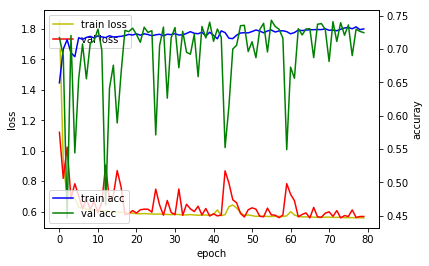

In [82]:
import pickle

hist = model.history

with open(colabdir+"LSTM_survival_time_09_07_bin_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_survival_time_09_07_bin_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# multi-label 분류 신경망 : amo

In [0]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X, y = scaled_df_amo.drop(columns=['acc_id','day']).values.reshape(40000,28,-1), to_categorical(amo_label_knn)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [84]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = X.shape[1]
input_dim = X.shape[2]
ylabel_dim = y.shape[1]

model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(time_step, input_dim), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(ylabel_dim, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 512)           1112064   
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              14681088  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)             

In [85]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_spent_amount_09_07_mul.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=15)

model.fit(x_train, y_train, batch_size=128, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 30000 samples, validate on 10000 samples
Epoch 1/80
30000/30000 [==============================] - 80s 3ms/step - loss: 2.3585 - acc: 0.6440 - val_loss: 1.5254 - val_acc: 0.6684

Epoch 00001: val_loss improved from inf to 1.52544, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_spent_amount_09_07_mul.h5
Epoch 2/80
30000/30000 [==============================] - 75s 3ms/step - loss: 1.3015 - acc: 0.7019 - val_loss: 1.3134 - val_acc: 0.4846

Epoch 00002: val_loss improved from 1.52544 to 1.31337, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_spent_amount_09_07_mul.h5
Epoch 3/80
30000/30000 [==============================] - 75s 3ms/step - loss: 0.9702 - acc: 0.7139 - val_loss: 0.8747 - val_acc: 0.7277

Epoch 00003: val_loss improved from 1.31337 to 0.87470, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_spent_amount_09_07_mul.h5
Epoch 4/80
30000/30000 [==============================] - 75s 2ms/step - loss: 0.8210 - acc: 0.7

In [0]:
model_json = model.to_json()
with open(colabdir+"LSTM_spent_amount_09_07_mul.json", "w") as json_file : 
    json_file.write(model_json)

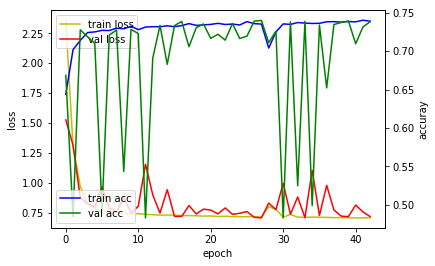

In [87]:
import pickle

hist = model.history

with open(colabdir+"LSTM_spent_amount_09_07_mul_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_spent_amount_09_07_mul_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 모델별 훈련

## survival_time : 보간값을 이용한 DATA가 더 분류 잘 됨 : 얘도 Regression으로?

In [88]:
scaled_df_sur.head()

,acc_id,day,combat_count,c_temp_cnt,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_play_rate_rank_per_p,p_play_char_cnt,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,trade_logged_in,count_sell,count_get,total_trade_count,a_fish,a_npc_kill,a_playtime,a_private_shop,a_quest_exp,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,activity_logged_in
0,2,1,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000130,0.004250,0.000000,0.000000,0.019084,0.000000,0.005848,0.000000,0.017804,0.000000,0.000130,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.734266,0.381254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000005,0.000248,0.000001,0.001389,0.000000,0.006098,0.005848,0.000000,0.002967,0.001965,0.000006,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,3,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000035,0.001884,0.000000,0.000000,0.000000,0.000000,0.005848,0.000000,0.002967,0.000000,0.000035,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,4,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,5,0.004386,0.0,1.0,0.0,0.0,0.109677,0.0,0.0,0.0,0.000001,0.000093,0.000000,0.000000,0.000000,0.000000,0.000000,0.003367,0.002967,0.000000,0.000001,1.0,0.007369,0.000705,0.007584,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
train_label_clustering.head()

,acc_id,survival_time,amount_spent,amo_group,sur_group
22410,2,64,0.000000,0,1
12651,5,60,0.000000,0,0
5494,8,64,0.020310,1,1
6811,17,64,0.070642,1,1
16854,20,64,0.052137,1,1


In [0]:
# 실제 knn으로 클러스터링 할 때 : 모델을 돌리고, 1st labeling df를 만들어서 보관, 그 다음 라벨에 따라서 데이터 분류 후 예측

In [91]:
train_label_sur = train_label_clustering[['acc_id','survival_time','sur_group']]
train_label_sur.head()

,acc_id,survival_time,sur_group
22410,2,64,1
12651,5,60,0
5494,8,64,1
6811,17,64,1
16854,20,64,1


In [0]:
# train_label_sur[train_label_sur['sur_group']==0]['survival_time'].value_counts().sort_values()

In [0]:
data = pd.merge(scaled_df_sur, train_label_sur, on='acc_id', how='left')
data_sur_0 = data[data['sur_group']==0]
data_sur_1 = data[data['sur_group']==1] # 생존

label_sur_0 = train_label_sur[train_label_sur['sur_group']==0]['survival_time'].values

In [0]:
from keras.utils.np_utils import to_categorical
X_sur_0 = data_sur_0.drop(columns=['acc_id','day','survival_time','sur_group']).values.reshape(len(label_sur_0),28,-1)
y_sur_0 = to_categorical(label_sur_0,num_classes=64)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sur_0,y_sur_0)

In [96]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = 28
input_dim = X_sur_0.shape[2]
ylabel_dim = y_sur_0.shape[1]

model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(time_step, input_dim), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(ylabel_dim, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 512)           1124352   
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              14681088  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)             

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_survival_time_preclf_09_08.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 13503 samples, validate on 4501 samples
Epoch 1/80
13503/13503 [==============================] - 65s 5ms/step - loss: 6.0165 - acc: 0.0862 - val_loss: 5.3545 - val_acc: 0.0535

Epoch 00001: val_loss improved from inf to 5.35447, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_preclf_09_08.h5
Epoch 2/80
13503/13503 [==============================] - 60s 4ms/step - loss: 4.8157 - acc: 0.1114 - val_loss: 4.4781 - val_acc: 0.1257

Epoch 00002: val_loss improved from 5.35447 to 4.47810, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_preclf_09_08.h5
Epoch 3/80
13503/13503 [==============================] - 60s 4ms/step - loss: 4.5092 - acc: 0.1154 - val_loss: 4.5109 - val_acc: 0.1100

Epoch 00003: val_loss did not improve from 4.47810
Epoch 4/80
13503/13503 [==============================] - 60s 4ms/step - loss: 4.3775 - acc: 0.1107 - val_loss: 4.2094 - val_acc: 0.1300

Epoch 00004: val_loss improved from 4.47810 to 4

In [0]:
model_json = model.to_json()
with open(colabdir + "LSTM_survival_time_preclf_09_08.json", "w") as json_file : 
    json_file.write(model_json)

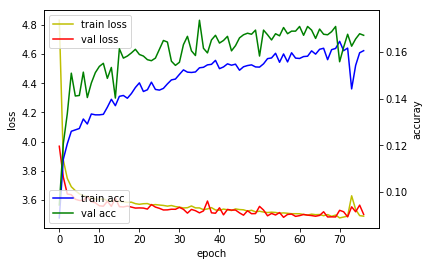

In [43]:
import pickle

hist = model.history

with open(colabdir+"LSTM_survival_time_preclf_09_08_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_survival_time_preclf_09_08_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## with attention

### Attention layer

In [24]:
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
        """
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it

        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
    #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim

Using TensorFlow backend.


In [64]:
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
import tensorflow as tf

import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = 28
input_dim = X_sur_0.shape[2]
ylabel_dim = y_sur_0.shape[1]

inp = Input(shape=(time_step, input_dim))
x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001) ))(inp)
x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))(x)
x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))(x)
x = Attention(time_step)(x)
x = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = Dense(ylabel_dim, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))(x)
model = Model(inputs=inp, outputs=x)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 36)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 28, 256)           168960    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 28, 256)           394240    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 28, 256)           394240    
_________________________________________________________________
attention_1 (Attention)      (None, 256)               284       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                164

In [65]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_survival_time_att_preclf_09_08.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13503 samples, validate on 4501 samples
Epoch 1/80
13503/13503 [==============================] - 88s 7ms/step - loss: 4.1041 - acc: 0.1189 - val_loss: 3.7182 - val_acc: 0.1357

Epoch 00001: val_loss improved from inf to 3.71815, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_att_preclf_09_08.h5
Epoch 2/80
13503/13503 [==============================] - 80s 6ms/step - loss: 3.6934 - acc: 0.1395 - val_loss: 3.6126 - val_acc: 0.1509

Epoch 00002: val_loss improved from 3.71815 to 3.61259, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_att_preclf_09_08.h5
Epoch 3/80
13503/13503 [==============================] - 80s 6ms/step - loss: 3.6342 - acc: 0.1482 - val_loss: 3.5882 - val_acc: 0.1533

Epoch 00003: val_loss improved from 3.61259 to 3.58823, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time

KeyboardInterrupt: ignored

In [0]:
import pickle

hist = model.history

with open(colabdir+"LSTM_survival_time_att_preclf_09_08_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_survival_time_att_preclf_09_08_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## fillna data

In [0]:
data = pd.merge(scaled_df_sur_0, train_label_sur, on='acc_id', how='left')
data_sur_0 = data[data['sur_group']==0]
data_sur_1 = data[data['sur_group']==1] # 생존

label_sur_0 = train_label_sur[train_label_sur['sur_group']==0]['survival_time'].values

from keras.utils.np_utils import to_categorical
X_sur_0 = data_sur_0.drop(columns=['acc_id','day','survival_time','sur_group']).values.reshape(len(label_sur_0),28,-1)
y_sur_0 = to_categorical(label_sur_0,num_classes=64)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sur_0,y_sur_0)

In [36]:
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
import tensorflow as tf

import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = 28
input_dim = X_sur_0.shape[2]
ylabel_dim = y_sur_0.shape[1]

inp = Input(shape=(time_step, input_dim))
x = Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))(inp)
x = Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))(x)
x = Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))(x)
x = Attention(time_step)(x)
x = Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(ylabel_dim, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))(x)
model = Model(inputs=inp, outputs=x)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 35)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 28, 1024)          2244608   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 28, 1024)          6295552   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 28, 1024)          6295552   
_________________________________________________________________
attention_1 (Attention)      (None, 1024)              1052      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0   

In [37]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_survival_time_att_preclf_09_08_NA0.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13503 samples, validate on 4501 samples
Epoch 1/80
13503/13503 [==============================] - 120s 9ms/step - loss: 4.8454 - acc: 0.1017 - val_loss: 3.8682 - val_acc: 0.1326

Epoch 00001: val_loss improved from inf to 3.86815, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_att_preclf_09_08_NA0.h5
Epoch 2/80
13503/13503 [==============================] - 113s 8ms/step - loss: 3.8234 - acc: 0.1214 - val_loss: 3.6970 - val_acc: 0.1580

Epoch 00002: val_loss improved from 3.86815 to 3.69703, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_att_preclf_09_08_NA0.h5
Epoch 3/80
13503/13503 [==============================] - 113s 8ms/step - loss: 3.7512 - acc: 0.1266 - val_loss: 3.6904 - val_acc: 0.1440

Epoch 00003: val_loss improved from 3.69703 to 3.69044, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_su

KeyboardInterrupt: ignored

In [0]:
import pickle

hist = model.history

with open(colabdir+"LSTM_survival_time_att_preclf_09_08_NA0_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_survival_time_att_preclf_09_08_NA0_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## amount_spent

### data preprocessing

In [0]:
scaled_df_amo.drop(columns='amount_spent',inplace=True) # 이거 나중 전처리에서 없애야 함

In [45]:
scaled_df_amo.head()

,acc_id,day,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_etc_cnt,p_c_cnt,p_random_attacker_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,get_item_amount,get_item_price,trade_type_1,count_get,a_fish,a_npc_kill,a_quest_exp,a_boss_monster,fishing_prop,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.001389,0.001965,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
train_label_amo = train_label_clustering[['acc_id','amount_spent','amo_group']]
train_label_amo.head()

,acc_id,amount_spent,amo_group
22410,2,0.000000,0
12651,5,0.000000,0
5494,8,0.020310,1
6811,17,0.070642,1
16854,20,0.052137,1


In [0]:
data = pd.merge(scaled_df_amo, train_label_amo, on='acc_id', how='left')
data_amo_0 = data[data['amo_group']==0]
data_amo_1 = data[data['amo_group']==1] # light
data_amo_2 = data[data['amo_group']==2] # heavy

label_amo_1 = train_label_amo[train_label_amo['amo_group']==1]['amount_spent'].values
label_amo_2 = train_label_amo[train_label_amo['amo_group']==2]['amount_spent'].values

from keras.utils.np_utils import to_categorical
X_amo_1 = data_amo_1.drop(columns=['acc_id','day','amount_spent','amo_group']).values.reshape(len(label_amo_1),28,-1)
y_amo_1 = label_amo_1

X_amo_2 = data_amo_2.drop(columns=['acc_id','day','amount_spent','amo_group']).values.reshape(len(label_amo_2),28,-1)
y_amo_2 = label_amo_2

#### amo_group = 1

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_amo_1,y_amo_1)

In [50]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = 28
input_dim = X_amo_1.shape[2]

model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(time_step, input_dim), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['msle'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 512)           1112064   
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              14681088  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)             

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_amo_1_preclf_09_08.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 14657 samples, validate on 4886 samples
Epoch 1/80
14657/14657 [==============================] - 70s 5ms/step - loss: 3.6894 - mean_squared_logarithmic_error: 0.1343 - val_loss: 2.1177 - val_mean_squared_logarithmic_error: 0.0039

Epoch 00001: val_loss improved from inf to 2.11772, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_amo_1_preclf_09_08.h5
Epoch 2/80
14657/14657 [==============================] - 65s 4ms/step - loss: 1.7371 - mean_squared_logarithmic_error: 0.0324 - val_loss: 1.2817 - val_mean_squared_logarithmic_error: 0.0044

Epoch 00002: val_loss improved from 2.11772 to 1.28174, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_amo_1_preclf_09_08.h5
Epoch 3/80
14657/14657 [==============================] - 64s 4ms/step - loss: 1.0688 - mean_squared_logarithmic_error: 0.0091 - val_loss: 0.8774 - val_mean_squared_logarithmic_error: 0.0046

Epoch 00003: val_loss improved from 1.28174 to 0.87737, saving model to /content/drive/My D

KeyboardInterrupt: ignored

In [52]:
pred = model.predict(X_amo_1)
pred

array([[0.09054639],
       [0.09267693],
       [0.09263834],
       ...,
       [0.09279174],
       [0.0955671 ],
       [0.09214777]], dtype=float32)

In [53]:
y_amo_1

array([0.02031004, 0.07064219, 0.05213676, ..., 0.03044865, 0.02907059,
       0.06020827])

In [0]:
model_json = model.to_json()
with open(colabdir+"LSTM_amo_1_preclf_09_08.json", "w") as json_file : 
    json_file.write(model_json)

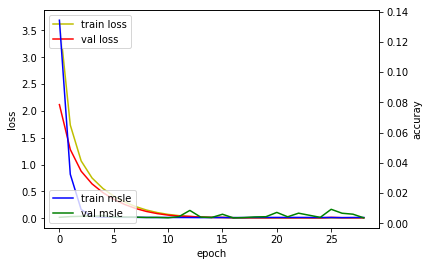

In [57]:
import pickle

hist = model.history

with open(colabdir+"LSTM_amo_1_preclf_09_08_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_amo_1_preclf_09_08_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mean_squared_logarithmic_error'], 'b', label='train msle')
acc_ax.plot(hist.history['val_mean_squared_logarithmic_error'], 'g', label='val msle')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### amo_group = 2

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_amo_2,y_amo_2)

In [59]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

time_step = 28
input_dim = X_amo_2.shape[2]

model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(time_step, input_dim), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='elu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['msle'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 512)           1112064   
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 512)           2099200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              14681088  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)             

In [60]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_amo_2_preclf_09_08.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 3014 samples, validate on 1005 samples
Epoch 1/80
3014/3014 [==============================] - 18s 6ms/step - loss: 11.0201 - mean_squared_logarithmic_error: 0.3353 - val_loss: 8.1233 - val_mean_squared_logarithmic_error: 0.2666

Epoch 00001: val_loss improved from inf to 8.12334, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_amo_2_preclf_09_08.h5
Epoch 2/80
3014/3014 [==============================] - 14s 5ms/step - loss: 10.0062 - mean_squared_logarithmic_error: 0.3518 - val_loss: 8.0178 - val_mean_squared_logarithmic_error: 0.3800

Epoch 00002: val_loss improved from 8.12334 to 8.01777, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_amo_2_preclf_09_08.h5
Epoch 3/80
3014/3014 [==============================] - 14s 5ms/step - loss: 9.5127 - mean_squared_logarithmic_error: 0.3428 - val_loss: 7.1792 - val_mean_squared_logarithmic_error: 0.1519

Epoch 00003: val_loss improved from 8.01777 to 7.17923, saving model to /content/drive/My Drive/

KeyboardInterrupt: ignored

In [61]:
pred = model.predict(X_amo_2)
pred

array([[0.32725668],
       [1.9537241 ],
       [0.35229003],
       ...,
       [0.5871419 ],
       [0.3564981 ],
       [0.3422832 ]], dtype=float32)

In [62]:
pred.max()

1.9601035

In [63]:
y_amo_2

array([0.51716775, 0.35619675, 0.41643783, ..., 0.61638837, 0.59050045,
       0.55198028])

In [0]:
model_json = model.to_json()
with open(colabdir+"LSTM_amo_2_preclf_09_08.json", "w") as json_file : 
    json_file.write(model_json)

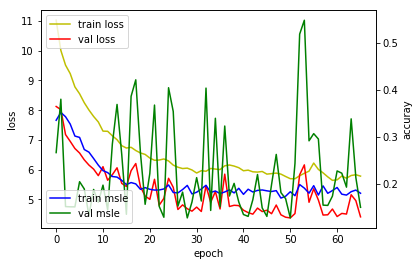

In [65]:
import pickle

hist = model.history

with open(colabdir+"LSTM_amo_2_preclf_09_08_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_amo_2_preclf_09_08_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mean_squared_logarithmic_error'], 'b', label='train msle')
acc_ax.plot(hist.history['val_mean_squared_logarithmic_error'], 'g', label='val msle')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Test Pipeline 생성

In [0]:
test1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0906-07-test1-v2.csv')
test2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0906-07-test2-v2.csv')

data_amo_test1 = test1.drop(columns=amo_droplist)
data_sur_test1 = test1.drop(columns=sur_droplist)
print(data_amo_test1.shape, data_sur_test1.shape)

data_amo_test2 = test2.drop(columns=amo_droplist)
data_sur_test2 = test2.drop(columns=sur_droplist)
print(data_amo_test2.shape, data_sur_test2.shape)

## Function Definition

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scaleData(data_amo, data_sur):
  scaled_amo = StandardScaler().fit_transform(data_amo.drop(columns=['acc_id','day']))
  scaled_amo = MinMaxScaler().fit_transform(scaled_amo)
  # scaled_amo = scaled_amo.reshape(40000,28,-1)
  scaled_sur = StandardScaler().fit_transform(data_sur.drop(columns=['acc_id','day']))
  scaled_sur = MinMaxScaler().fit_transform(scaled_sur)
  # scaled_sur = scaled_amo.reshape(40000,28,-1)

  scaled_df_amo = data_amo.copy()
  amo_cols = data_amo.drop(columns=['acc_id','day']).columns
  scaled_df_amo[amo_cols] = scaled_amo

  scaled_df_sur = data_sur.copy()
  sur_cols = data_sur.drop(columns=['acc_id','day']).columns
  scaled_df_sur[sur_cols] = scaled_sur
  
  return scaled_df_amo, scaled_df_sur

from keras.models import model_from_json

def load_model(json_path, h5_path):
  json_file = open(json_path, "r")
  loaded_model_json = json_file.read()
  json_file.close()
  mod = model_from_json(loaded_model_json)
  mod.load_weights(h5_path)
  return mod

## dataframe for group

In [0]:
scaled_df_amo_test1, scaled_df_sur_test1 = scaleData(data_amo_test1, data_sur_test1)
scaled_df_amo_test2, scaled_df_sur_test2 = scaleData(data_amo_test2, data_sur_test2)

### predicting group

In [0]:
label_test1 = pd.DataFrame(columns=['acc_id','sur_group','amo_group','survival_time','amount_spent'])
label_test2 = pd.DataFrame(columns=['acc_id','sur_group','amo_group','survival_time','amount_spent'])

label_test1['acc_id'] = data_amo_test1['acc_id']
label_test2['acc_id'] = data_amo_test2['acc_id']

X_sur_test1 = scaled_df_sur_test1.drop(columns=['acc_id','day']).values.reshape(20000,28,-1)
X_amo_test1 = scaled_df_amo_test1.drop(columns=['acc_id','day']).values.reshape(20000,28,-1)
X_sur_test2 = scaled_df_sur_test2.drop(columns=['acc_id','day']).values.reshape(20000,28,-1)
X_amo_test2 = scaled_df_sur_test2.drop(columns=['acc_id','day']).values.reshape(20000,28,-1)

# classifier model restore

json_path = colabdir + "LSTM_survival_time_09_07_bin.json"
h5_path = colabdir + "LSTM_survival_time_09_07_bin.h5"
sur_bin_clf = load_model(json_path, h5_path)
sur_group_test1 = sur_bin_clf.predict(X_sur_test1)
sur_group_test2 = sur_bin_clf.predict(X_sur_test2)

json_path = colabdir + "LSTM_spent_amount_09_07_mul.json"
h5_path = colabdir + "LSTM_spent_amount_09_07_mul.h5"
amo_mul_clf = load_model(json_path,h5_path)
amo_group_test1 = amo_mul_clf.predict(X_amo_test1)
amo_group_test2 = amo_mul_clf.predict(X_amo_test2)

label_test1['sur_group'] = sur_group_test1
label_test1['amo_group'] = amo_group_test1
label_test2['sur_group'] = sur_group_test2
label_test2['amo_group'] = amo_group_test2

label_sur_test1 = label_test1.drop(columns=['amo_group','amount_spent'])
label_sur_test2 = label_test2.drop(columns=['amo_group','amount_spent'])

label_amo_test1 = label_test1.drop(columns=['sur_group','survival_times'])
label_amo_test2 = label_test2.drop(columns=['sur_group','survival_times'])

### predicting answer : survial time

In [0]:
def sur_split(scaled_df_sur, label_sur_test):
  data = pd.merge(scaled_df_sur, label_sur_test, on='acc_id', how='left')
  data_sur_0 = data[data['sur_group']==0]
  data_sur_1 = data[data['sur_group']==1]
  label_sur_0 = data_sur_0[['acc_id','sur_group']]
  label_sur_1 = data_sur_1[['acc_id','sur_group']]
  label_sur_1['survival_times'] = 64
  X_sur_0 = data_sur_0.drop(columns=['acc_id','day','survival_time','sur_group']).values.reshape(len(label_sur_0),28,-1)
  return X_sur_0, label_sur_0, label_sur_1

X_sur_0_test1, label_sur_0_test1, label_sur_1_test1 = sur_split(scaled_df_sur_test1, label_sur_test1)
X_sur_0_test2, label_sur_0_test2, label_sur_1_test2 = sur_split(scaled_df_sur_test2, label_sur_test2)

jpath = colabdir + "LSTM_survival_time_preclf_09_08.json"
hpath = colabdir + "LSTM_survival_time_preclf_09_08.h5"

model_sur_0 = load_model(jpath, hpath)
pred_sur_01 = model_sur_0.predict(X_sur_0_test1)
pred_sur_02 = model_sur_0.predict(X_sur_0_test2)

label_sur_0_test1['survival_times'] = pred_sur_01
label_sur_0_test2['survival_times'] = pred_sur_02

sur_label_test1 = pd.concat([label_sur_0_test1,label_sur_1_test1]).drop(columns='sur_group')
sur_label_test2 = pd.concat([label_sur_0_test2,label_sur_1_test2]).drop(columns='sur_group')

### predicting answer:spent amount

In [0]:
def amo_split(scaled_df_amo, label_amo_test):
  data = pd.merge(scaled_df_amo, label_amo_test, on='acc_id', how='left')
  data_amo_0 = data[data['amo_group']==0]
  data_amo_1 = data[data['amo_group']==1]
  data_amo_2 = data[data['amo_group']==2]
  
  label_amo_0 = data_amo_0[['acc_id','amo_group']]
  label_amo_1 = data_amo_1[['acc_id','amo_group']]
  label_amo_2 = data_amo_2[['acc_id','amo_group']]
  
  label_amo_0['amount_spent'] = 0
  
  X_amo_1 = data_amo_1.drop(columns=['acc_id','day','amount_spent','amo_group']).values.reshape(len(label_amo_1),28,-1)
  X_amo_2 = data_amo_2.drop(columns=['acc_id','day','amount_spent','amo_group']).values.reshape(len(label_amo_2),28,-1)
  return X_amo_1, X_amo_2, label_amo_0, label_amo_1, label_amo_2

X_amo_1_test1, X_amo_2_test1, label_amo_0_test1, label_amo_1_test1, label_amo_2_test1 = amo_split(scaled_df_amo_test1, label_amo_test1)
X_amo_1_test2, X_amo_2_test2, label_amo_0_test2, label_amo_1_test2, label_amo_2_test2 = amo_split(scaled_df_amo_test2, label_amo_test2)

jpath = colabdir + "LSTM_amo_1_preclf_09_08.json"
hpath = colabdir + "LSTM_amo_1_preclf_09_08.h5"

model_amo_1 = load_model(jpath, hpath)
pred_amo_11 = model_amo_1.predict(X_amo_1_test1)
pred_amo_12 = model_amo_1.predict(X_amo_1_tets2)

jpath = colabdir + "LSTM_amo_2_preclf_09_08.json"
hpath = colabdir + "LSTM_amo_2_preclf_09_08.h5"

model_amo_2 = load_model(jpath, hpath)
pred_amo_21 = model_amo_2.predict(X_amo_2_test1)
pred_amo_22 = model_amo_2.predict(X_amo_2_tets2)

label_amo_1_test1['amount_spent'] = pred_amo_11
label_amo_1_test2['amount_spent'] = pred_amo_12
label_amo_2_test1['amount_spent'] = pred_amo_21
label_amo_2_test2['amount_spent'] = pred_amo_22

amo_label_test1 = pd.concat([label_amo_0_test1,label_amo_1_test1,label_amo_2_test1]).drop(columns='amo_group')
amo_label_test2 = pd.concat([label_amo_0_test2,label_amo_1_test2,label_amo_2_test2]).drop(columns='amo_group')

In [0]:
label_test1 = pd.merge(label_test1[['acc_id']],sur_label_test1,on='acc_id',how='left')
label_test1 = pd.merge(label_test1,amo_label_test1,on='acc_id',how='left')

label_test2 = pd.merge(label_test2[['acc_id']],sur_label_test2,on='acc_id',how='left')
label_test2 = pd.merge(label_test2,amo_label_test2,on='acc_id',how='left')

In [0]:
label_test1.to_csv('test1')
label_test2.to_csv('test2')